In [1]:
import numpy as np # linear algebra
import pandas as pd 

## IMPORT LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## IMPORT DATASET

In [3]:
train_df = pd.read_csv('D:/train.csv', index_col = 'Id')
test_df = pd.read_csv('D:/test.csv', index_col = 'Id')

In [4]:
train_df.shape


(1460, 80)

There are a total of 1460 training examples, having 80 features and 1 target column, i.e. SalePrice.



In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

A lot of missing values in Alley, PoolQC, Fence, and MiscFeature. Thus, it would be reasonable to remove these features.

In [6]:
train_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)
test_df.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1, inplace = True)

In [7]:
pd.set_option('display.max_columns', 100)
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
train_df.head(10)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
7,20,RL,75.0,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,0,8,2007,WD,Normal,307000
8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
9,50,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,0,4,2008,WD,Abnorml,129900


## 1. EXPLORATORY DATA ANALYSIS



1.1 OUTLIERS




The famous dataset consists of a few major outliers, which we will remove at the very beginning to ensure that the statistical measures aren't affected by these outliers.



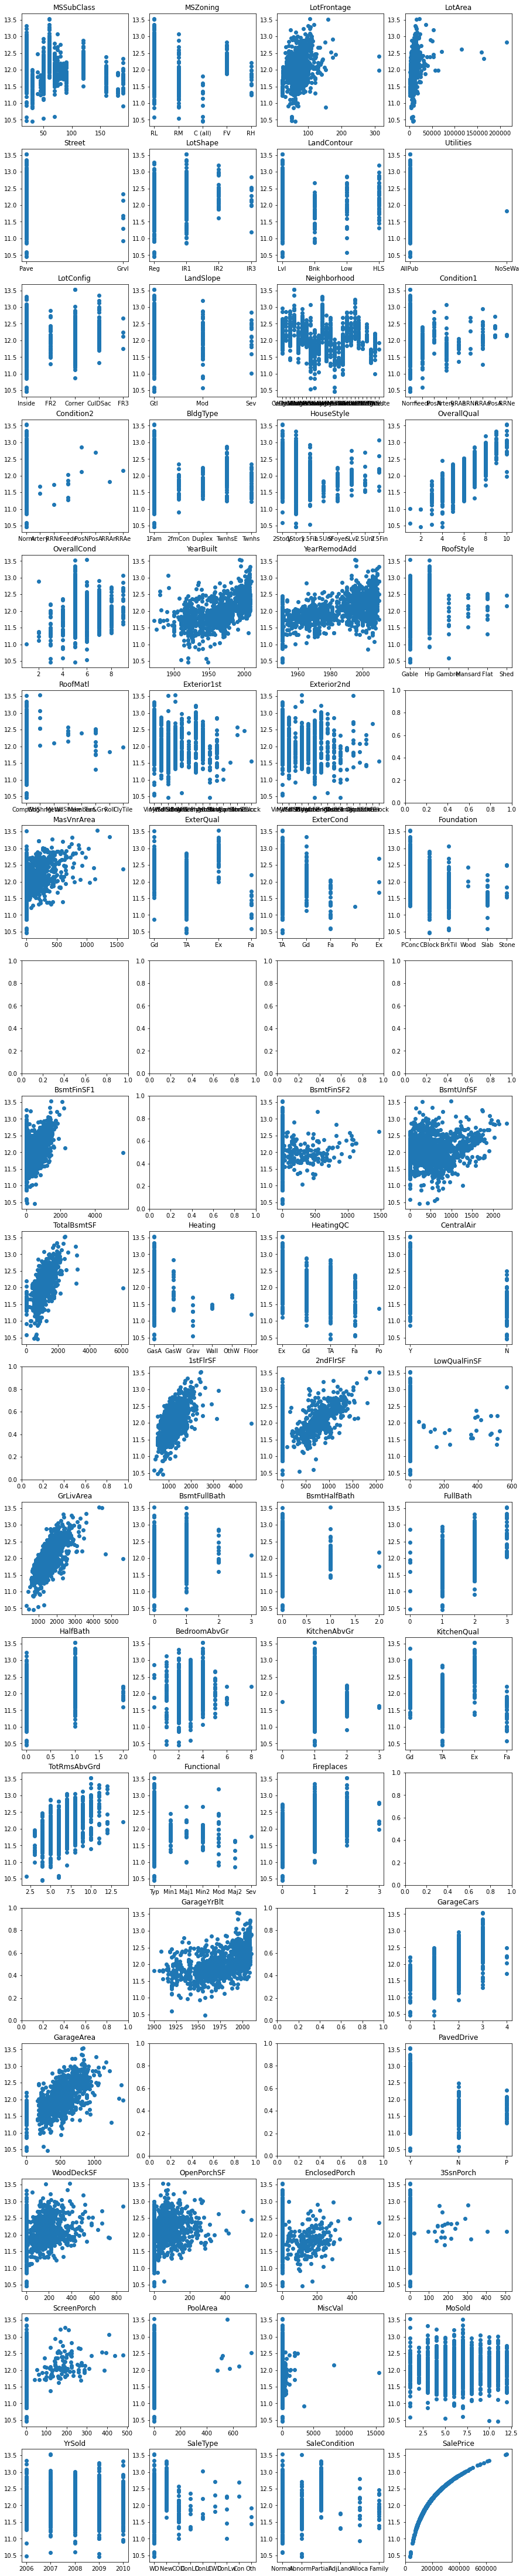

In [9]:
b = int(train_df.shape[1]/4)
r = int(train_df.shape[1]/4)
c = int(train_df.shape[1]/b)
i = 0
fig, ax = plt.subplots(nrows = r, ncols = c, figsize=(15, 80))
for row in ax:
    for col in row:
        try:
            col.scatter(x = train_df[train_df.columns[i]], 
                        y = np.log(train_df['SalePrice']))
            col.title.set_text(train_df.columns[i])
        except:
            temp=1
        finally:
            temp=1
        i = i + 1
        
plt.show()



After analysing the effects of the outliers on the results of a simple Random Forest Regressor model, two cases stood out which deteriorated model performance:


1.GrLivArea > 4000 and SalePrice < 200000
2.OverallQual > 9 and SalePrice < 300000

In [11]:
train_df[(train_df['GrLivArea'] > 4000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,Edwards,PosN,PosN,1Fam,2Story,10,5,2007,2008,Hip,CompShg,CemntBd,CmentBd,Stone,762.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,2260,Unf,0,878,3138,GasA,Ex,Y,SBrkr,3138,1538,0,4676,1,0,3,1,3,1,Ex,11,Typ,1,Gd,BuiltIn,2007.0,Fin,3,884,TA,TA,Y,208,406,0,0,0,0,0,10,2007,New,Partial,184750
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000
1183,60,RL,160.0,15623,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1996,1996,Hip,CompShg,Wd Sdng,ImStucc,None,0.0,Gd,TA,PConc,Ex,TA,Av,GLQ,2096,Unf,0,300,2396,GasA,Ex,Y,SBrkr,2411,2065,0,4476,1,0,3,1,4,1,Ex,10,Typ,2,TA,Attchd,1996.0,Fin,3,813,TA,TA,Y,171,78,0,0,0,555,0,7,2007,WD,Abnorml,745000
1299,60,RL,313.0,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644,Unf,0,466,6110,GasA,Ex,Y,SBrkr,4692,950,0,5642,2,0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,0,1,2008,New,Partial,160000


In [12]:
#removing outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea'] >= 4000) & 
                       (train_df['SalePrice'] <= 200000)].index)

In [13]:
train_df[(train_df['OverallQual'] > 9)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
59,60,RL,66.0,13682,Pave,IR2,HLS,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,BrkFace,1031.0,Ex,TA,PConc,Ex,TA,Gd,Unf,0,Unf,0,1410,1410,GasA,Ex,Y,SBrkr,1426,1519,0,2945,0,0,3,1,3,1,Gd,10,Typ,1,Gd,BuiltIn,2006.0,Fin,3,641,TA,TA,Y,192,0,37,0,0,0,0,10,2006,New,Partial,438780
186,75,RM,90.0,22950,Pave,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0,Unf,0,1107,1107,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0,0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3,840,Ex,TA,Y,0,260,0,0,410,0,0,6,2006,WD,Normal,475000
225,20,RL,103.0,13472,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2003,2003,Hip,CompShg,VinylSd,VinylSd,BrkFace,922.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,56,Unf,0,2336,2392,GasA,Ex,Y,SBrkr,2392,0,0,2392,0,0,2,0,3,1,Ex,8,Typ,1,Ex,Attchd,2003.0,Fin,3,968,TA,TA,Y,248,105,0,0,0,0,0,6,2009,WD,Normal,386250
390,60,RL,96.0,12474,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2007,2008,Gable,CompShg,VinylSd,VinylSd,Stone,272.0,Ex,TA,PConc,Ex,TA,Av,GLQ,1280,Unf,0,402,1682,GasA,Ex,Y,SBrkr,1742,590,0,2332,1,0,2,1,3,1,Ex,9,Typ,1,Ex,BuiltIn,2008.0,Fin,3,846,TA,TA,Y,196,134,0,0,0,0,0,8,2008,New,Partial,426000
441,20,RL,105.0,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1767,ALQ,539,788,3094,GasA,Ex,Y,SBrkr,2402,0,0,2402,1,0,2,0,2,1,Ex,10,Typ,2,Gd,Attchd,2008.0,Fin,3,672,TA,TA,Y,0,72,0,0,170,0,0,4,2009,WD,Normal,555000
516,20,RL,94.0,12220,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2009,2009,Hip,CompShg,CemntBd,CmentBd,BrkFace,305.0,Ex,TA,CBlock,Ex,TA,No,GLQ,1436,Unf,0,570,2006,GasA,Ex,Y,SBrkr,2020,0,0,2020,1,0,2,1,3,1,Ex,9,Typ,1,Gd,Attchd,2009.0,Fin,3,900,TA,TA,Y,156,54,0,0,0,0,0,9,2009,New,Partial,402861
584,75,RM,75.0,13500,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,PosA,1Fam,2.5Unf,10,9,1893,2000,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Ex,Ex,BrkTil,TA,TA,No,Unf,0,Unf,0,1237,1237,GasA,Gd,Y,SBrkr,1521,1254,0,2775,0,0,3,1,3,1,Gd,9,Typ,1,Gd,Detchd,1988.0,Unf,2,880,Gd,TA,Y,105,502,0,0,0,0,0,7,2008,WD,Normal,325000
592,60,RL,97.0,13478,Pave,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,10,5,2008,2008,Gable,CompShg,CemntBd,CmentBd,Stone,420.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1338,Unf,0,384,1722,GasA,Ex,Y,SBrkr,1728,568,0,2296,1,0,2,1,3,1,Ex,10,Typ,1,Gd,BuiltIn,2008.0,RFn,3,842,TA,TA,Y,382,274,0,0,0,0,0,6,2009,ConLI,Normal,451950
692,60,RL,104.0,21535,Pave,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,1455,Unf,0,989,2444,GasA,Ex,Y,SBrkr,2444,1872,0,4316,0,1,3,1,4,1,Ex,10,Typ,2,Ex,Attchd,1994.0,Fin,3,832,TA,TA,Y,382,50,0,0,0,0,0,1,2007,WD,Normal,755000


In [14]:
#removing outliers
train_df = train_df.drop(train_df[(train_df['OverallQual'] > 9) & 
                       (train_df['SalePrice'] < 300000)].index)

1.2 FEATURE ENGINEERING

Generally, when we go to buy a house, we are generally concerned with two most important features, i.e. total surface area and age of the building. Therefore, we will add these two predictors before proceeding further.

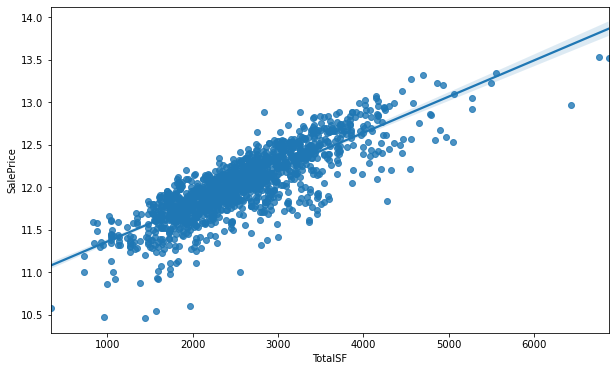

In [16]:
train_df['TotalSF'] = train_df['TotalBsmtSF'] + train_df['1stFlrSF'] + train_df['2ndFlrSF']
test_df['TotalSF'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

plt.figure(figsize = (10,6))
sns.regplot(x = 'TotalSF', y = np.log(train_df['SalePrice']), data = train_df)
plt.show()

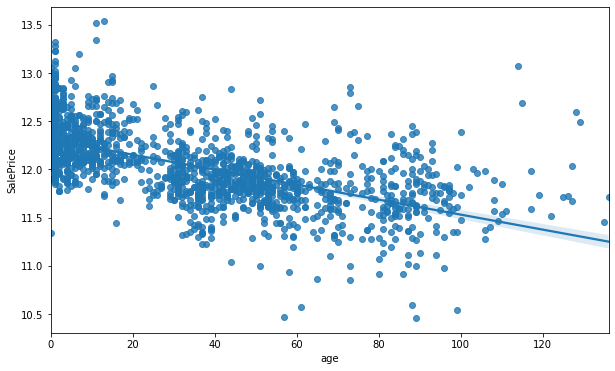

In [17]:
train_df['age'] = train_df['YrSold'] - train_df['YearBuilt']
test_df['age'] = test_df['YrSold'] - test_df['YearBuilt']

plt.figure(figsize = (10,6))
sns.regplot(x = 'age', y = np.log(train_df['SalePrice']), data = train_df)
plt.show()

Classifying columns as categorical and numerical:



In [18]:
def col_type(col):
    if (col.nunique() <= 10) | (col.dtype == 'object'):
        return 'cat'
    else:
        return 'num'
    
categorical_col = [cname for cname in train_df.columns
                  if col_type(train_df[cname]) == 'cat']
numerical_col = [cname for cname in train_df.columns
                if col_type(train_df[cname]) == 'num']

print('Categorical Columns: {}'.format(categorical_col))
print('Numerical Columns: {}'.format(numerical_col))

Categorical Columns: ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolArea', 'YrSold', 'SaleType', 'SaleCondition']
Numerical Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'Op

However, owing to very few number of houses with a pool, PoolArea got wrongly classified as a categorical feature.



In [19]:
numerical_col.append('poolArea')
categorical_col.remove('PoolArea')


1.3 CORRELATION ANALYSIS



<AxesSubplot:>

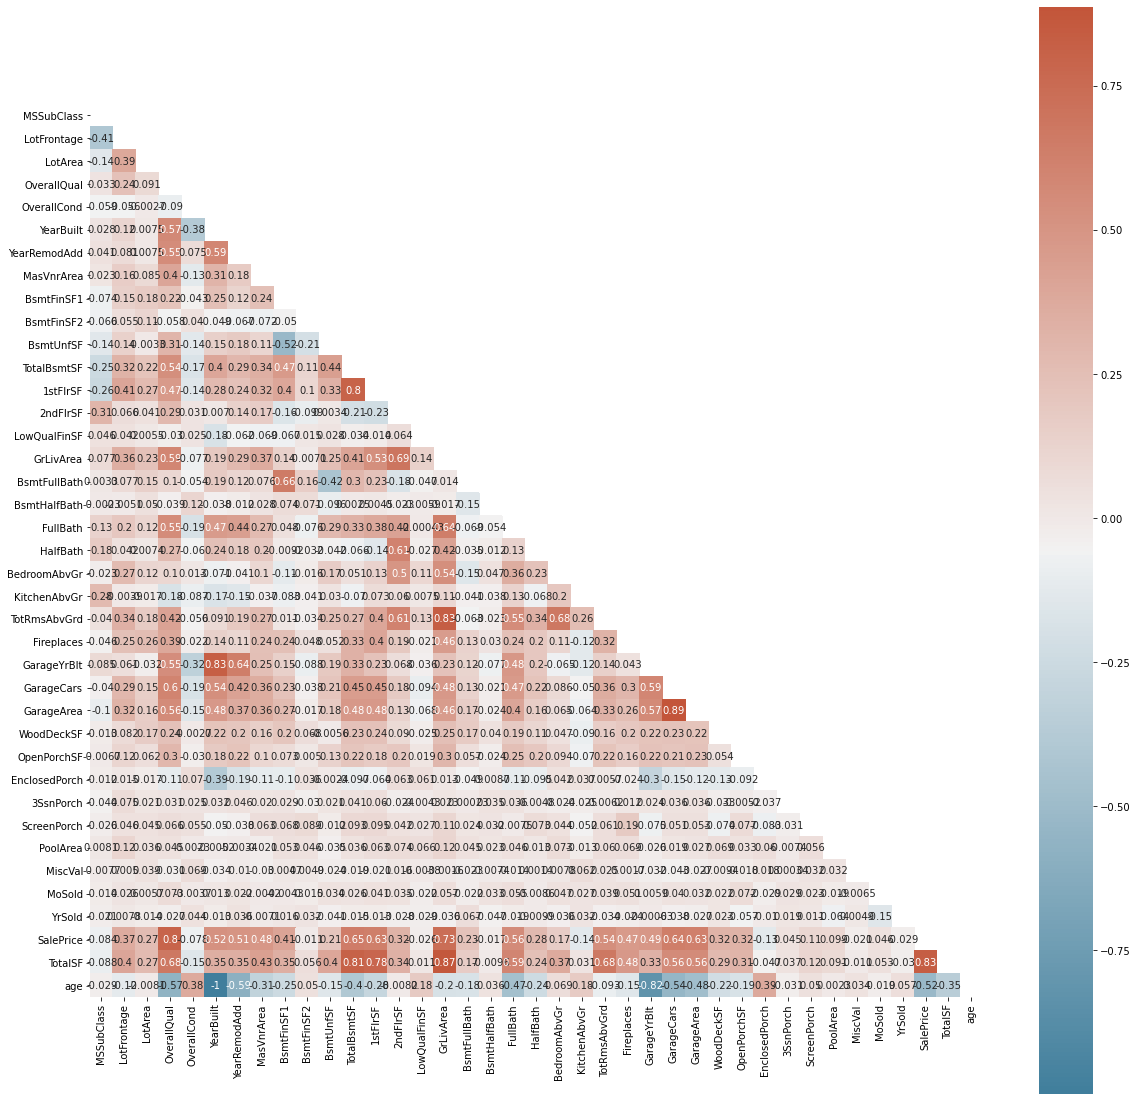

In [20]:
corrMat = train_df.corr()

f, ax = plt.subplots(figsize = (20,20))
cmap = sns.diverging_palette(230, 20, as_cmap = True)
mask = np.triu(np.ones_like(corrMat, dtype = bool))
sns.heatmap(corrMat, square = True, annot = True, cmap = cmap, mask = mask)

Let's go with the following rules of thumb:



1. Any two predictor variables having correlation coefficient greater than or equal to 0.7 can be said to have high positive correlation, and thus, any one of the two could be removed.



2. Same goes for pairs of predictor variables having correlation coefficient less than or equal to -0.7.



3. Predictor variables having correlation greater than 0.6 or less than -0.6 with the target SalePrice can be labeled as important predictors/features.



<AxesSubplot:>

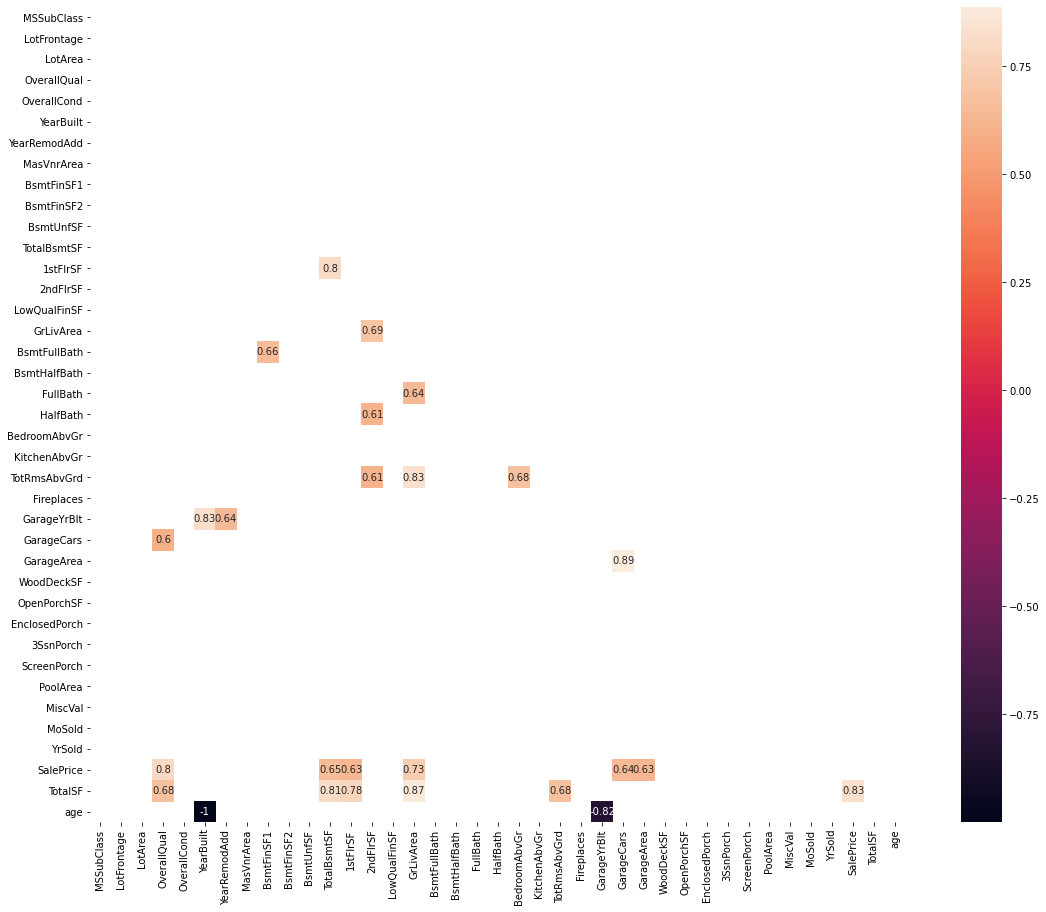

In [21]:
related = corrMat[corrMat.abs() >= 0.6]
plt.figure(figsize = (20,15))
mask = np.triu(np.ones_like(related, dtype = bool))
sns.heatmap(related, annot = True, square = True, mask = mask)

From the above plot:



1. Pairs YearBuilt & GarageYrBlt, GarageArea & GarageCars, TotRmsAbvGrd & GrLivArea, 2ndFlrSF & GrLivArea, 1stFlrSF & TotalBsmtSF, and TotalSF & <TotalBsmtSF, 1stFlrSF, GrLivArea> have high correlations and hence one from each pair can be removed. Say, we will remove GarageYrBlt, GarageCars, TotRmsAbvGrd, 1stFlrSF, 2ndFlrSF, and GrLivArea.

2. Predictors OverallQual, GrLivArea, TotalBsmtSF, and GarageArea have high correlation with target SalePrice. Hence, these are our important features.

In [23]:
removables = ['GarageYrBlt','GarageCars','TotRmsAbvGrd',
              '1stFlrSF', '2ndFlrSF','GrLivArea']
categorical_col.remove('GarageCars')

Now, we are going to look for predictors that have very low correlation with the target SalePrice, i.e. features that have little to no effect on our target variable. For this, we will look into our correlation matrix and extract only those features that have correlation coefficient value between -0.1 and 0.1 with the target SalePrice.



Note: Dropping features based on their feature-to-target-correlation essentially is a form of feature filtering. It is important to understand that feature filtering does not necessarily improve predictive performance. This is because for complex regression models, these features might get coupled with other features and contribute to the predictive performance of the model.

For the above reason, we are not going to remove these features from the training set just yet. Instead, we will observe how a particular model would perform with and without these features. Then we can take that result to determine whether or not to keep these features.

<AxesSubplot:>

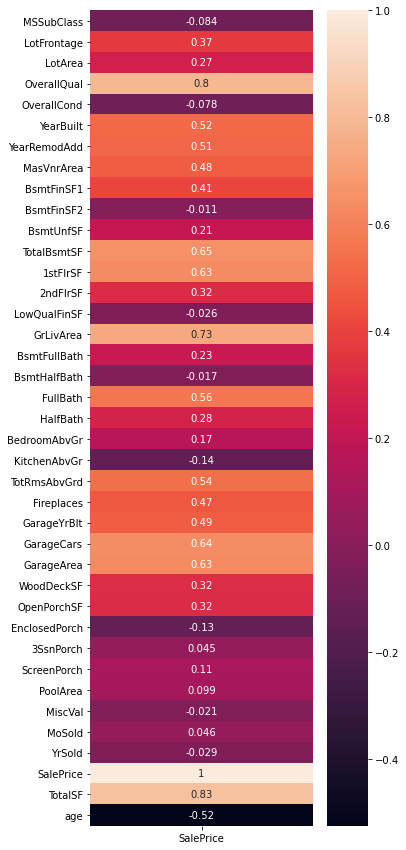

In [24]:
plt.figure(figsize = (5,15))
S = corrMat[['SalePrice']]
sns.heatmap(S, annot = True)

In [25]:
lowCorrFeatures = []
for col in corrMat.index:
    if (col in numerical_col) & (-0.1 <= corrMat[col]['SalePrice'] <= 0.1):
        lowCorrFeatures.append(col)
print(lowCorrFeatures)

['MSSubClass', 'BsmtFinSF2', 'LowQualFinSF', '3SsnPorch', 'MiscVal', 'MoSold']


In [26]:
#removing all the removable predictors from dataframe
train_df.drop(removables, axis = 1, inplace = True)
test_df.drop(removables, axis = 1, inplace = True)
train_df.drop(lowCorrFeatures, axis = 1, inplace = True)
test_df.drop(lowCorrFeatures, axis = 1, inplace = True)

train_df.shape


(1458, 66)

## 2. DATA CLEANING

Before we jump into data cleaning, it is good practice to first split up the dataset into train and validation sets. This is to ensure that data leakage doesn't seep into our model.

if any other feature whose value would not actually be available in practice at the time you’d want to use the model to make a prediction, is a feature that can introduce leakage to your model

In [27]:
from sklearn.model_selection import train_test_split

X = train_df.copy()
y = X.SalePrice
X.drop('SalePrice', axis = 1, inplace = True)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, 
                                                     random_state = 42)
X_test = test_df.copy()
# print(X_train.shape, y_train.shape) -> (1168, 70) (1168,)

First of all, determine the amount and type of missing data in the given dataframe.



In [28]:
missing_val_cols = X_train.isnull().sum().sort_values(ascending = False)
missing_val_cols = missing_val_cols[missing_val_cols > 0]
ratio_of_missing = missing_val_cols / X_train.shape[0]
missing_cols = pd.concat([missing_val_cols, ratio_of_missing * 100], axis = 1,
                        keys = ['Count','%'])
missing_cols

,Count,%
FireplaceQu,552,47.341338
LotFrontage,213,18.267581
GarageCond,68,5.831904
GarageType,68,5.831904
GarageFinish,68,5.831904
GarageQual,68,5.831904
BsmtFinType2,32,2.744425
BsmtExposure,32,2.744425
BsmtFinType1,32,2.744425
BsmtQual,32,2.744425


In [29]:
# For 'Electrical', 'MasVnrArea' and 'MasVnrType', removing the entries with missing values.
y_train.drop(X_train.loc[X_train.Electrical.isnull()].index, axis = 0, inplace = True)
X_train.drop(X_train.loc[X_train.Electrical.isnull()].index, axis = 0, inplace = True)
#y_train.drop(X_train.loc[X_train.MasVnrArea.isnull()].index, axis = 0, inplace = True)
#X_train.drop(X_train.loc[X_train.MasVnrArea.isnull()].index, axis = 0, inplace = True)
#y_train.drop(X_train.loc[X_train.MasVnrType.isnull()].index, axis = 0, inplace = True)
#X_train.drop(X_train.loc[X_train.MasVnrType.isnull()].index, axis = 0, inplace = True)


# For The following features, it's apparent that a missing entry is a direct indication 
# of absence of the corresponding functionality. Thus, treating NaN as a separate 
# class 'missing' would be wise.
X_train['BsmtQual'] = X_train['BsmtQual'].fillna('missing')
X_train['BsmtCond'] = X_train['BsmtCond'].fillna('missing')
X_train['BsmtExposure'] = X_train['BsmtExposure'].fillna('missing')
X_train['BsmtFinType1'] = X_train['BsmtFinType1'].fillna('missing')
X_train['BsmtFinType2'] = X_train['BsmtFinType2'].fillna('missing')

X_train['GarageCond'] = X_train['GarageCond'].fillna('missing')
X_train['GarageQual'] = X_train['GarageQual'].fillna('missing')
X_train['GarageFinish'] = X_train['GarageFinish'].fillna('missing')
X_train['GarageType'] = X_train['GarageType'].fillna('missing')

X_train['MasVnrArea'] = X_train['MasVnrArea'].fillna(0)
X_train['MasVnrType'] = X_train['MasVnrType'].fillna('missing')

X_train['FireplaceQu'] = X_train['FireplaceQu'].fillna('missing')

# Same for test set
X_test['BsmtQual'] = X_test['BsmtQual'].fillna('missing')
X_test['BsmtCond'] = X_test['BsmtCond'].fillna('missing')
X_test['BsmtExposure'] = X_test['BsmtExposure'].fillna('missing')
X_test['BsmtFinType1'] = X_test['BsmtFinType1'].fillna('missing')
X_test['BsmtFinType2'] = X_test['BsmtFinType2'].fillna('missing')

X_test['GarageCond'] = X_test['GarageCond'].fillna('missing')
X_test['GarageQual'] = X_test['GarageQual'].fillna('missing')
X_test['GarageFinish'] = X_test['GarageFinish'].fillna('missing')
X_test['GarageType'] = X_test['GarageType'].fillna('missing')

X_test['Electrical'] = X_test['Electrical'].fillna('SBrkr')
X_test['MasVnrArea'] = X_test['MasVnrArea'].fillna(0)
X_test['MasVnrType'] = X_test['MasVnrType'].fillna('missing')

X_test['FireplaceQu'] = X_test['FireplaceQu'].fillna('missing')

# For GarageCond, rows with missing field overlaps with rows having missing fields for
# other Garage related features. Same goes for BsmtCond. Thus, by deleting just these rows 
# we can effectively deal with all related missing entries.
#X_train.drop(X_train.loc[X_train.GarageCond.isnull()].index, axis = 0, inplace = True)
#X_train.drop(X_train.loc[X_train.BsmtCond.isnull()].index, axis = 0, inplace = True)
#garage_removables = ['GarageCond', 'GarageType', 'GarageFinish', 'GarageQual']
#removables.append(garage_removables)
#X_train.drop(garage_removables, axis = 1, inplace = True)
#X_valid.drop(garage_removables, axis = 1, inplace = True)

In [30]:
print(X_train.shape)
print(y_train.shape)

(1165, 65)
(1165,)


For LotFrontage:



1.Dropping the column is out the question as in the actual market scenario, measure of linear feet of street connected to the property has significant effect on the price.

2.For this exact reason, imputing the missing values would result in nonsensical data.

3.Deleting rows with missing field would mean throwing away about 20% of the training dataset.

We can further confirm the effect of LotFrontage on target variable with the help of the following plot:



<Figure size 864x432 with 0 Axes>

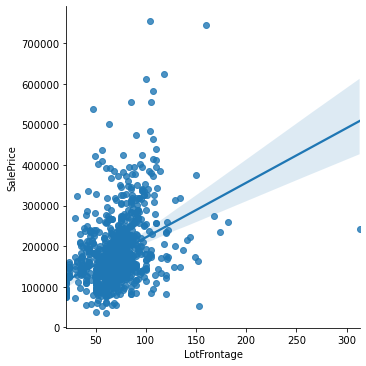

In [32]:
full_train = pd.concat([X_train,y_train], axis = 1)
plt.figure(figsize = (12,6))
sns.lmplot(x = 'LotFrontage', y = 'SalePrice', data = full_train)
plt.show()


As is obvious from the above plot, there is plenty positive correlation between the two.



Therefore, we need to proceed with caution while dealing with this feature. One way to deal with the situation is to build a model that predicts the missing values of LotFrontage. Here, we treat LotFrontage as the dependent variable while the other features would be independent variables.

In [33]:
# Encoding categorical columns from X_train and storing in new dataframe. 
temp_df = pd.get_dummies(X_train, columns = categorical_col, drop_first = True)

# Dataframe consisting of non-null values of LotFrontage. This will serve as training set.
df_non_nulls = temp_df[temp_df['LotFrontage'].notnull()].copy()
lot_y = df_non_nulls.LotFrontage.copy()
lot_X = df_non_nulls.drop('LotFrontage', axis = 1, inplace = False)

lot_x_train, lot_x_valid, lot_y_train, lot_y_valid = train_test_split(lot_X, lot_y,
                                                                     test_size = 0.2,
                                                                     random_state = 42)

# Fitting model on the training set with target LotFrontage.
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(max_depth = 25, min_samples_leaf = 2, random_state = 0)
rfr.fit(lot_x_train,lot_y_train)
score = rfr.score(lot_x_valid,lot_y_valid)
#print(score) -> 0.6335685958712058

# Dataframe consisting of null values of LotFrontage. This is our test set as here we
# don't know a single value of LotFrontage.
df_nulls = temp_df[temp_df['LotFrontage'].isnull()].copy()
df_nulls.drop('LotFrontage', axis = 1, inplace = True)
df_nulls['LotFrontage'] = rfr.predict(df_nulls)

# Now copying the predicted values of LotFrontage back to the original training set.
for idx in df_nulls.index:
    X_train.loc[X_train.index == idx, 'LotFrontage'] = df_nulls.loc[idx]['LotFrontage']

In [34]:
X_train.isnull().any().any()


False

This concludes the part of dealing with missing values. (Finally!!)



In [35]:
missing_val_cols_valid = X_valid.isnull().sum().sort_values(ascending = False)
missing_val_cols_valid = missing_val_cols_valid[missing_val_cols_valid > 0]
ratio_of_missing_valid = missing_val_cols_valid / X_valid.shape[0]
missing_cols_valid = pd.concat([missing_val_cols_valid, ratio_of_missing_valid * 100], axis = 1,
                        keys = ['Count','%'])
missing_cols_valid

,Count,%
FireplaceQu,138,47.260274
LotFrontage,46,15.753425
GarageCond,13,4.452055
GarageType,13,4.452055
GarageFinish,13,4.452055
GarageQual,13,4.452055
BsmtFinType2,6,2.054795
BsmtExposure,6,2.054795
BsmtFinType1,5,1.712329
BsmtQual,5,1.712329


Applying the same imputation rules as the training set:



In [36]:
y_valid.drop(X_valid.loc[X_valid.MasVnrArea.isnull()].index, axis = 0, inplace = True)
X_valid.drop(X_valid.loc[X_valid.MasVnrArea.isnull()].index, axis = 0, inplace = True)
y_valid.drop(X_valid.loc[X_valid.MasVnrType.isnull()].index, axis = 0, inplace = True)
X_valid.drop(X_valid.loc[X_valid.MasVnrType.isnull()].index, axis = 0, inplace = True)

X_valid['BsmtQual'] = X_valid['BsmtQual'].fillna('missing')
X_valid['BsmtCond'] = X_valid['BsmtCond'].fillna('missing')
X_valid['BsmtExposure'] = X_valid['BsmtExposure'].fillna('missing')
X_valid['BsmtFinType1'] = X_valid['BsmtFinType1'].fillna('missing')
X_valid['BsmtFinType2'] = X_valid['BsmtFinType2'].fillna('missing')

X_valid['GarageCond'] = X_valid['GarageCond'].fillna('missing')
X_valid['GarageQual'] = X_valid['GarageQual'].fillna('missing')
X_valid['GarageFinish'] = X_valid['GarageFinish'].fillna('missing')
X_valid['GarageType'] = X_valid['GarageType'].fillna('missing')

X_valid['FireplaceQu'] = X_valid['FireplaceQu'].fillna('missing')

In [37]:
temp_df_valid = pd.get_dummies(X_valid, columns = categorical_col, drop_first = True)
temp_df, temp_df_valid = temp_df.align(temp_df_valid, join = 'left', axis = 1)

df_nulls_valid = temp_df_valid[temp_df_valid.LotFrontage.isnull()].copy()
df_nulls_valid.drop('LotFrontage', axis = 1, inplace = True)
df_nulls_valid = df_nulls_valid.fillna(0)

df_nulls_valid['LotFrontage'] = rfr.predict(df_nulls_valid)

for idx in df_nulls_valid.index:
    X_valid.loc[X_valid.index == idx, 'LotFrontage'] = df_nulls_valid.loc[idx]['LotFrontage']
    

# Same for test set
temp_df_test = pd.get_dummies(X_test, columns = categorical_col, drop_first = True)
temp_df, temp_df_test = temp_df.align(temp_df_test, join = 'left', axis = 1)

df_nulls_test = temp_df_test[temp_df_test.LotFrontage.isnull()].copy()
df_nulls_test.drop('LotFrontage', axis = 1, inplace = True)
df_nulls_test = df_nulls_test.fillna(0)

df_nulls_test['LotFrontage'] = rfr.predict(df_nulls_test)

for idx in df_nulls_test.index:
    X_test.loc[X_test.index == idx, 'LotFrontage'] = df_nulls_test.loc[idx]['LotFrontage']

In [38]:
X_valid.isnull().any().any()


False

## 3. ENCODING

Firstly, let us look at the categorical features we have:



In [39]:
print(categorical_col)


['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


There are many rating variables (i.e. 1-10), which will be better off in the numerical variables set.



In [40]:
numerical_col.append(['OverallQual','OverallCond'])
categorical_col.remove('OverallQual')
categorical_col.remove('OverallCond')

# Updated list of categorical variables:
print(categorical_col)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'YrSold', 'SaleType', 'SaleCondition']


Out of these, there are many ordinal variables and many nominal ones. So, appropriate encoding techniques need to be used.

FOR ORDINAL VARIABLES: First off, we have to hand pick all ordinal variables. For that, examining the data_description.txt file would help.

In [41]:
ordinal_variables = ['LotShape','Utilities','LandSlope','ExterQual','ExterCond',
                    'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                    'HeatingQC','KitchenQual','Functional','FireplaceQu',
                    'GarageFinish','GarageQual','GarageCond','PavedDrive']
nominal_variables = list(set(categorical_col) - set(ordinal_variables))

from category_encoders.ordinal import OrdinalEncoder
oe = OrdinalEncoder(cols = ordinal_variables, mapping = [
    {'col':'LotShape','mapping':{'IR3':0,'IR2':1,'IR1':2,'Reg':3}},
    {'col':'Utilities','mapping':{'ELO':0,'NoSeWa':1,'NoSeWr':2,'AllPub':3}},
    {'col':'LandSlope','mapping':{'Sev':0,'Mod':1,'Gtl':2}},
    {'col':'ExterQual','mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}},
    {'col':'ExterCond','mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}},
    {'col':'BsmtQual','mapping':{'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}},
    {'col':'BsmtCond','mapping':{'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}},
    {'col':'BsmtExposure','mapping':{'missing':0,'No':1,'Mn':2,'Av':3,'Gd':4}},
    {'col':'BsmtFinType1','mapping':{'missing':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}},
    {'col':'BsmtFinType2','mapping':{'missing':0,'Unf':1,'LwQ':2,'Rec':3,'BLQ':4,'ALQ':5,'GLQ':6}},
    {'col':'HeatingQC','mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}},
    {'col':'KitchenQual','mapping':{'Po':0,'Fa':1,'TA':2,'Gd':3,'Ex':4}},
    {'col':'Functional','mapping':{'Sal':0,'Sev':1,'Maj2':2,'Maj1':3,'Mod':4,'Min2':5,'Min1':6,'Typ':7}},
    {'col':'FireplaceQu','mapping':{'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}},
    {'col':'GarageFinish','mapping':{'missing':0,'Unf':1,'Rfn':2,'Fin':3}},
    {'col':'GarageQual','mapping':{'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}},
    {'col':'GarageCond','mapping':{'missing':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}},
    {'col':'PavedDrive','mapping':{'N':0,'P':1,'Y':2}}
])

X_train = oe.fit_transform(X_train)
X_valid = oe.transform(X_valid)
X_test = oe.transform(X_test)

# print(X_train.shape) -> (1161, 70)
# print(X_valid.shape) -> (290, 70)

FOR NOMINAL VARIABLES: For these, we will use the good ol' one hot encoding technique.



In [42]:
X_train = pd.get_dummies(X_train)
X_valid = pd.get_dummies(X_valid)
X_test = pd.get_dummies(X_test)
X_train, X_valid = X_train.align(X_valid, join = 'left', axis = 1)
X_train, X_test = X_train.align(X_test, join = 'left', axis = 1)

# print(X_train.shape) -> (1161, 208)
# print(X_valid.shape) -> (290, 208)

## 4. FEATURE SCALING

Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.



Standardizing is a popular scaling technique that subtracts the mean from values and divides by the standard deviation, transforming the probability distribution for an input variable to a standard Gaussian (zero mean and unit variance). Standardization can become skewed or biased if the input variable contains outlier values.

To overcome this, the median and interquartile range can be used when standardizing numerical input variables, generally referred to as robust scaling.



In [43]:
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler() #To make dataset robust to outliers.
robust_X_train = scaler.fit_transform(X_train)
robust_X_valid = scaler.transform(X_valid)
robust_X_test = scaler.transform(X_test)

sc = StandardScaler()
scaled_X_train = sc.fit_transform(robust_X_train)
scaled_X_valid = sc.transform(robust_X_valid)
scaled_X_test = sc.transform(robust_X_test)

On passing through the Scalers, our Data Frame has now been converted to a numpy array. So, for convention, we will convert the array back to a Data Frame.

In [44]:
final_X_train = pd.DataFrame(scaled_X_train, index = X_train.index, 
                             columns = X_train.columns)
final_X_valid = pd.DataFrame(scaled_X_valid, index = X_valid.index,
                             columns = X_valid.columns)
final_X_test = pd.DataFrame(scaled_X_test, index = X_test.index,
                            columns = X_test.columns)

final_X_train.describe()

,LotFrontage,LotArea,LotShape,Utilities,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,YrSold,TotalSF,age,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkCmn,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MasVnrType_missing,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_missing,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,...,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03,1.165000e+03
mean,-2.134678e-17,-1.758250e-17,-2.439632e-17,4.148327e-16,-3.049540e-17,3.049540e-17,7.538081e-17,-1.031126e-16,-4.421832e-17,7.318895e-17,7.776326e-17,-3.383560e-16,-7.985982e-17,4.391575e-16,-8.843665e-17,-1.848783e-17,2.210916e-17,-2.792235e-17,-1.105458e-17,5.088919e-17,-1.349421e-16,1.772545e-16,-6.175318e-17,5.514902e-16,-6.689928e-17,-6.918643e-17,-2.859420e-16,-2.878003e-17,-5.885612e-16,-6.899583e-17,1.612444e-16,3.245854e-16,1.696306e-17,-1.018737e-16,-1.048279e-16,-1.758250e-16,2.925652e-17,-4.124026e-17,2.427243e-16,-3.262054e-16,-4.908806e-16,-3.173427e-17,1.286525e-17,4.479011e-17,1.146198e-16,3.654683e-17,-1.042323e-16,1.642939e-16,-2.017461e-16,-1.547403e-16,...,1.084373e-16,-1.799228e-16,2.561613e-16,-1.199803e-16,-1.113558e-16,-3.815022e-16,-1.065433e-16,-1.892621e-16,-5.403403e-16,1.146198e-16,-2.838931e-16,-4.156904e-16,1.185509e-16,2.123718e-16,1.987919e-16,2.436177e-16,-4.567579e-16,3.485052e-16,-6.098841e-16,-1.298913e-16,-4.148327e-16,1.084373e-16,-1.201709e-16,1.201709e-16,1.726802e-16,7.199772e-17,-9.793072e-17,-1.650563e-16,1.115703e-16,-1.467591e-17,3.836940e-16,1.235064e-16,1.424707e-16,-8.233757e-17,-9.972948e-17,2.719332e-16,1.793510e-16,-1.819717e-16,1.079728e-16,2.067969e-16,5.458676e-16,1.505710e-17,1.698570e-16,2.067016e-16,4.696291

With this, we are now done with data anaytics.



## 5. MODEL FITTING AND EVALUATION

It goes without saying that for a dataset having 200+ features, we have to employ complex curve fitting regression techniques. Some regression techniques we are going to use are:



1.Decision Tree Regressor

2.Random Forest Regressor

3.XG Boost Regressor

4.Ada Boost Regressor

5.K-Nearest-Neighbors Regressor

6.Ridge Regressor

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge

# For parameter selection and comparison, use RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [47]:
dt = DecisionTreeRegressor()
rfr = RandomForestRegressor()
ada = AdaBoostRegressor()
xgb = XGBRegressor()
knn = KNeighborsRegressor()
rdg = Ridge()

Next, we will use RandomizedSearchCV to define and test different combinations of parameters. This is an important step as many a times simply hypertuning the parameters can drastically improve the model performance.

In [48]:
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error
from scipy.stats import uniform, randint

scorer = make_scorer(mean_absolute_error) # Mean Absolute Error as scorer

# # # # # # # # Decision Tree # # # # # # # #
dt_params = {'criterion' : ['mae','friedman_mse'],
            'splitter' : ['best', 'random'],
            'max_depth' : np.arange(1,50),
            'max_features' : ['auto','log2','sqrt'],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf' : [2, 3, 4, 5, 10, 15, 20]}
dt_rs = RandomizedSearchCV(dt, param_distributions = dt_params,
                          scoring = scorer, cv = 5)

# # # # # # # # Random Forest # # # # # # # #
rfr_params = {'criterion' : ['mse', 'mae'],
              'n_estimators' : [50, 100, 200, 400, 500],
              'max_depth' : np.arange(1,50),
              'max_features' : ['auto','log2','sqrt'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf' : [2, 3, 4, 5, 10, 20, 30, 40, 50]}
rfr_rs = RandomizedSearchCV(rfr, param_distributions = rfr_params, 
                            scoring = scorer, cv = 5)

# # # # # # # # ADA Boost # # # # # # # #
ada_params = {'n_estimators' : [50, 100, 200, 400, 500],
              'learning_rate' : np.arange(0,1,0.01),
              'loss' : ['linear', 'square']}
ada_rs = RandomizedSearchCV(ada, param_distributions = ada_params, 
                            scoring = scorer, cv = 5)

# # # # # # # #  XG Boost # # # # # # # #
xgb_params = {'n_estimators' : [50, 100, 200, 300, 400, 500],
              'learning_rate' : np.arange(0,1,0.01),
              'min_child_weight' : np.arange(1,10)}
xgb_rs = RandomizedSearchCV(xgb, param_distributions = xgb_params, 
                            scoring = scorer, cv = 5)

# # # # # # # #  K-Nearest Neighbors # # # # # # # #
knn_params = {'n_neighbors' : np.arange(1,50),
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree', 'kd_tree']}
knn_rs = RandomizedSearchCV(knn, param_distributions = knn_params, 
                            scoring = scorer, cv = 5)

# # # # # # # #  Ridge # # # # # # # #
rdg_params = {'alpha' : np.arange(0,1,0.01),
              'solver' : ['auto', 'lsqr', 'saga']}
rdg_rs = RandomizedSearchCV(rdg, param_distributions = rdg_params, 
                            scoring = scorer, cv = 5)


Now that we have our models and their hyperparameter combinations defined, let's fit each model on the training set and evaluate their scores.

In [51]:
# # # # # # # # FITTING # # # # # # # #
dt_rs.fit(final_X_train, y_train)
rfr_rs.fit(final_X_train, y_train)
ada_rs.fit(final_X_train, y_train)
xgb_rs.fit(final_X_train, y_train)
knn_rs.fit(final_X_train, y_train)
rdg_rs.fit(final_X_train, y_train)

# # # # # # # # EVALUATION # # # # # # # # 
print('Decision Tree best parameters:', dt_rs.best_params_)
print('Random Forest best parameters:', rfr_rs.best_params_)
print('Ada Boost best parameters:', ada_rs.best_params_)
print('XGB best parameters:', xgb_rs.best_params_)
print('KNN best parameters:', knn_rs.best_params_)
print('Ridge best parameters:', rdg_rs.best_params_)

Decision Tree best parameters: {'splitter': 'random', 'min_samples_split': 10, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': 46, 'criterion': 'friedman_mse'}
Random Forest best parameters: {'n_estimators': 400, 'min_samples_split': 2, 'min_samples_leaf': 50, 'max_features': 'log2', 'max_depth': 6, 'criterion': 'mse'}
Ada Boost best parameters: {'n_estimators': 100, 'loss': 'square', 'learning_rate': 0.99}
XGB best parameters: {'n_estimators': 100, 'min_child_weight': 1, 'learning_rate': 0.97}
KNN best parameters: {'weights': 'uniform', 'n_neighbors': 42, 'algorithm': 'kd_tree'}
Ridge best parameters: {'solver': 'lsqr', 'alpha': 0.03}


This gives us the best set of parameters correspoding to each model.



Next, we have to tune the optimized parameters onto the respective models:



In [52]:
# # # # # # # # Decision Tree # # # # # # # #
dt = DecisionTreeRegressor(criterion = dt_rs.best_params_['criterion'], 
                           splitter = dt_rs.best_params_['splitter'], 
                           max_depth = dt_rs.best_params_['max_depth'],
                           max_features = dt_rs.best_params_['max_features'], 
                           min_samples_split = dt_rs.best_params_['min_samples_split'],
                           min_samples_leaf = dt_rs.best_params_['min_samples_leaf'], 
                           random_state = 42)

# # # # # # # # Random Forest # # # # # # # #
rfr = RandomForestRegressor(criterion = rfr_rs.best_params_['criterion'], 
                            n_estimators = rfr_rs.best_params_['n_estimators'],  
                            max_depth = rfr_rs.best_params_['max_depth'],
                            max_features = rfr_rs.best_params_['max_depth'],
                            min_samples_split = rfr_rs.best_params_['min_samples_split'], 
                            min_samples_leaf = rfr_rs.best_params_['min_samples_leaf'], 
                            random_state = 42)

# # # # # # # # ADA Boost # # # # # # # #
ada = AdaBoostRegressor(n_estimators = ada_rs.best_params_['n_estimators'], 
                        learning_rate = ada_rs.best_params_['learning_rate'], 
                        loss = ada_rs.best_params_['loss'],
                        random_state = 42)

# # # # # # # #  XG Boost # # # # # # # #
xgb = XGBRegressor(n_estimators = xgb_rs.best_params_['n_estimators'], 
                    learning_rate = xgb_rs.best_params_['learning_rate'], 
                    min_child_weight = xgb_rs.best_params_['min_child_weight'],
                    random_state = 42, eval_metric = 'logloss')

# # # # # # # #  K-Nearest Neighbors # # # # # # # #
knn = KNeighborsRegressor(n_neighbors=  knn_rs.best_params_['n_neighbors'], 
                          weights = knn_rs.best_params_['weights'],
                          algorithm = knn_rs.best_params_['algorithm'])

# # # # # # # #  Ridge # # # # # # # #
rdg = Ridge(alpha = rdg_rs.best_params_['alpha'],
            solver = rdg_rs.best_params_['solver'])



models = [(dt, 'Decision Tree'), (rfr, 'Random Forest'), 
          (ada, 'Ada Boost'), (xgb, 'XG Boost'), 
          (knn, 'K Neighbors'), (rdg, 'Ridge')]

After tuning the best suitable parameters to each and every model, we will now measure how well these models do with respect to some scoring criterias.

In [53]:
final_X_valid = final_X_valid.fillna(0)
final_X_test = final_X_test.fillna(0)

In [54]:
#dataframe to keep track of scores of various models
evaluations = pd.DataFrame({'Model' : [], 'MAE' : [], 
                            'MSE' : [], 'RMSE' : []})

#function that evaluates and returns different scores obtained by a model
def evaluate(actual, preds):
    mae = mean_absolute_error(actual, preds)
    mse = mean_squared_error(actual, preds)
    rmse  = mean_squared_error(actual, preds, squared = False)
    return (mae, mse, rmse)

# Fitting and evaluating the models one by one
for model, model_name in models:
    model.fit(final_X_train, y_train)
    preds = model.predict(final_X_valid)
    mae, mse, rmse = evaluate(y_valid, preds)
    cur_model = {'Model' : model_name, 'MAE' : mae, 
                 'MSE' : mse, 'RMSE' : rmse}
    evaluations = evaluations.append(cur_model, ignore_index = True)
    #print('Model: {} f1: {:.3f} accuracy: {:.3f}'.format(model_name, f1, accuracy))
    
evaluations.set_index('Model', inplace = True)
evaluations

,MAE,MSE,RMSE
Model,,,
Decision Tree,45156.360983,3.764348e+09,61354.286076
Random Forest,34693.705542,2.207658e+09,46985.722219
Ada Boost,23660.224303,1.029682e+09,32088.657298
XG Boost,22520.039170,1.131601e+09,33639.280883
K Neighbors,29331.330706,1.709502e+09,41346.126643
Ridge,19112.224862,7.099099e+08,26644.135135


Out of all the models, Ridge has shown the best results. Thus, we'll base our final test predictions on the rdg model.



## 6. PREDICTION

With everything prepared, now we just have to predict target value in the test set based on the model we'd fit on the training set.



In [55]:
final_X_test.shape


(1459, 203)

In [56]:
# make predictions
test_predictions = xgb.predict(final_X_test)

# convert to csv
output = pd.DataFrame({'Id' : final_X_test.index, 'SalePrice' : test_predictions})
output.to_csv('submission.csv', index = False)

And we're done! The output file is now ready for submission.